In [1]:
import os

In [2]:
data_dir = "F:\\tensorflow\\cell_images"

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
path = "gdrive/My Drive/Colab Notebooks/Tensorflow 2 and Keras/CNN/cell_images"
os.listdir(path)

['train', 'test']

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
from matplotlib.image import imread

In [7]:
test_path = path + "//test//"
train_path = path + "//train//"

In [8]:
os.listdir(test_path)

['uninfected', 'parasitized']

In [9]:
os.listdir(train_path)

['uninfected', 'parasitized']

In [10]:
os.listdir(train_path + "parasitized")[0]

'C97P58ThinF_IMG_20150917_151903_cell_3.png'

In [11]:
para_cell = train_path + "parasitized//C97P58ThinF_IMG_20150917_151903_cell_3.png"
para_cell

'gdrive/My Drive/Colab Notebooks/Tensorflow 2 and Keras/CNN/cell_images//train//parasitized//C97P58ThinF_IMG_20150917_151903_cell_3.png'

In [12]:
imread(para_cell).shape

(136, 112, 3)

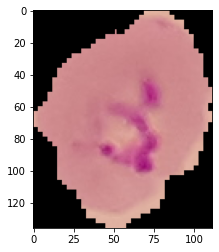

In [13]:
plt.imshow(imread(para_cell))

In [14]:
un_cell = train_path + "uninfected//" + os.listdir( train_path + "uninfected//")[0]
un_cell

'gdrive/My Drive/Colab Notebooks/Tensorflow 2 and Keras/CNN/cell_images//train//uninfected//C74P35_ThinF_IMG_20150815_113951_cell_61.png'

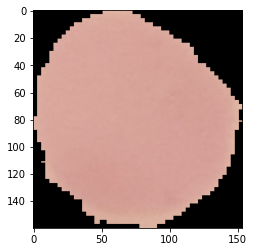

In [15]:
plt.imshow(imread(un_cell))

In [16]:
pwd

'/content'

In [17]:
len(os.listdir(train_path + "parasitized//"))

12480

In [18]:
len(os.listdir(train_path + "uninfected//"))

12480

In [22]:
dim1 = []
dim2 = []

dir = test_path+"uninfected//"
# count = 0
for image_filename in os.listdir(dir):
  # count +=1
  img = imread(dir + image_filename)
  d1, d2, _ = img.shape
  # print(count, dir + image_filename, d1, d1)
  dim1.append(d1)
  dim2.append(d2)

In [23]:
dim1

[166,
 148,
 127,
 139,
 142,
 118,
 142,
 175,
 124,
 157,
 118,
 136,
 145,
 103,
 127,
 115,
 127,
 106,
 133,
 181,
 154,
 148,
 145,
 133,
 127,
 130,
 130,
 115,
 142,
 130,
 133,
 121,
 148,
 130,
 130,
 115,
 100,
 130,
 145,
 115,
 109,
 130,
 133,
 91,
 106,
 142,
 124,
 112,
 136,
 106,
 133,
 97,
 127,
 145,
 166,
 130,
 115,
 103,
 124,
 112,
 142,
 124,
 115,
 112,
 109,
 175,
 127,
 121,
 103,
 172,
 121,
 124,
 127,
 121,
 121,
 91,
 130,
 124,
 133,
 121,
 127,
 124,
 118,
 151,
 127,
 118,
 130,
 130,
 112,
 136,
 136,
 136,
 109,
 130,
 121,
 94,
 118,
 109,
 103,
 127,
 106,
 133,
 118,
 130,
 94,
 124,
 139,
 127,
 106,
 127,
 133,
 97,
 121,
 121,
 172,
 118,
 109,
 130,
 103,
 145,
 136,
 115,
 115,
 115,
 109,
 124,
 121,
 118,
 124,
 112,
 121,
 100,
 127,
 130,
 103,
 133,
 100,
 106,
 124,
 127,
 118,
 106,
 115,
 127,
 118,
 127,
 145,
 97,
 118,
 157,
 163,
 124,
 118,
 124,
 130,
 148,
 97,
 127,
 115,
 127,
 124,
 130,
 121,
 115,
 109,
 130,
 145,
 112,


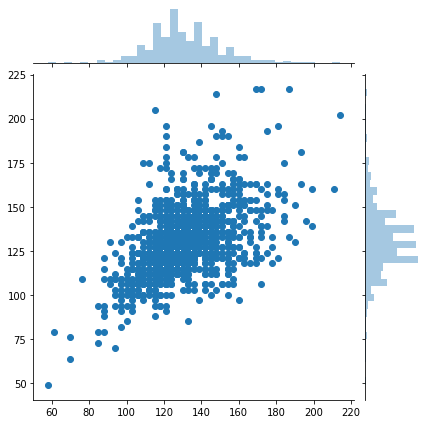

In [24]:
sns.jointplot(dim1, dim2)

In [25]:
np.mean(dim1)

130.92538461538462

In [26]:
np.mean(dim2)

130.75

In [27]:
image_shape = (130, 130, 3)

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
image_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode="nearest")

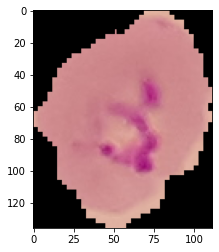

In [33]:
plt.imshow(imread(para_cell))

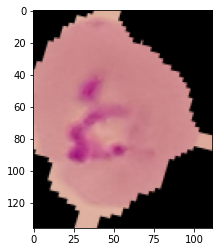

In [34]:
para_img = imread(para_cell)
plt.imshow(image_gen.random_transform(para_img))

In [35]:
train_path

'gdrive/My Drive/Colab Notebooks/Tensorflow 2 and Keras/CNN/cell_images//train//'

In [36]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [37]:
from tensorflow.keras.models import Sequential

In [42]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [43]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)            

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
early_stop = EarlyStopping(monitor="val_loss", patience=2)

In [47]:
batch_size = 16

In [52]:
train_image_gen = image_gen.flow_from_directory(train_path, target_size=image_shape[:2], color_mode="rgb", batch_size=batch_size, class_mode="binary")

Found 24958 images belonging to 2 classes.


In [53]:
test_image_gen = image_gen.flow_from_directory(test_path, target_size=image_shape[:2], color_mode="rgb", batch_size=batch_size, class_mode="binary", shuffle=False)

Found 2600 images belonging to 2 classes.


In [51]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [56]:
# results = model.fit_generator(train_image_gen, epochs=20, validation_data=test_image_gen, callbacks=[early_stop])

In [57]:
from tensorflow.keras.models import load_model

trained_model = "gdrive/My Drive/Colab Notebooks/Tensorflow 2 and Keras/CNN/malaria_detector.h5"

In [58]:
model = load_model(trained_model)

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [61]:
model.evaluate_generator(test_image_gen)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[34.57914352416992, 0.8680769205093384]

In [62]:
model.metrics_names

['loss', 'accuracy']

In [63]:
pred = model.predict_generator(test_image_gen)

Instructions for updating:
Please use Model.predict, which supports generators.


In [65]:
predictions = pred > 0.5

In [66]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [68]:
len(pred)

2600

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88      1300
           1       0.97      0.76      0.86      1300

    accuracy                           0.87      2600
   macro avg       0.89      0.87      0.87      2600
weighted avg       0.89      0.87      0.87      2600



In [71]:
print(confusion_matrix(test_image_gen.classes, predictions))

[[1272   28]
 [ 306  994]]


In [72]:
from tensorflow.keras.preprocessing import image

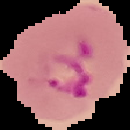

In [75]:
my_image = image.load_img(para_cell, target_size=image_shape)
my_image

In [76]:
my_img_array = image.img_to_array(my_image)
my_img_array

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [78]:
my_img_array.shape

(130, 130, 3)

In [79]:
my_img_array = np.expand_dims(my_img_array, axis=0)
my_img_array.shape

(1, 130, 130, 3)

In [80]:
model.predict(my_img_array)

array([[0.]], dtype=float32)